# Sentiment analysis of Twitter reviews

In [ ]:
# Uploading files from my computer
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:
# Importing libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re
from bs4 import BeautifulSoup

In [ ]:
# Importing my dataset as dataframe
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Twitter_reviews.csv', engine= 'python')

In [ ]:
# Shape of the dataset
data.shape

(1048575, 3)

In [ ]:
# Shuffling the dataframe to avoid chances of biasness
data= data.sample(frac= 1)

In [ ]:
# Reading first five rows of my dataset
data.head()

,ItemID,Sentiment,SentimentText
89905,89917,1,@cleaninggirl That was adorable!! Thanks for t...
33905,33917,1,@aishadee how's the cheese block going? im so ...
20164,20176,0,"@_VQ_ Your Dallas, Boston, and London optio..."
28332,28344,0,@ABSCBNNews BANK ROBBERY ON GOING fronting Eli...
511887,511899,1,@TwiObsession Goodnight! *hugs* Take good care...


In [ ]:
# As ItemID is only for indexing, so I am deleting it
#data= data.drop(columns= 'ItemID')
del data['ItemID']

In [ ]:
# Brief info about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 89905 to 611676
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Sentiment      1048575 non-null  int64 
 1   SentimentText  1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.0+ MB


In [ ]:
print(type(data))
print(type(data['Sentiment']))
print(type(data['SentimentText']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
data.columns

Index(['Sentiment', 'SentimentText'], dtype='object')

In [ ]:
# Checking null values in our dataset
data.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

In [ ]:
# Checking duplicate values if any
data.duplicated().sum()

16

In [ ]:
# Dropping duplicate values
data.drop_duplicates( inplace= True )

In [ ]:
# Checking duplicate values now again
data.duplicated().sum()

0

In [ ]:
# Unique values in our dataframe
data.nunique()

Sentiment              2
SentimentText    1048558
dtype: int64

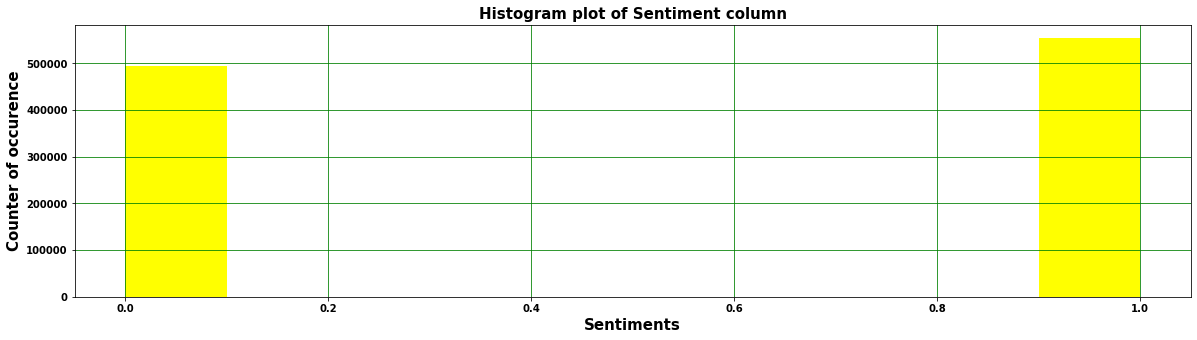

In [ ]:
# Histogram plot of Sentiment column : 0 means sad and 1 means happy.
plt.figure(figsize= (20, 5))
plt.hist(data['Sentiment'], color= 'yellow')
plt.xlabel('Sentiments', fontweight= 'bold', fontsize= 15)
plt.ylabel('Counter of occurence', fontweight= 'bold', fontsize= 15)
plt.title('Histogram plot of Sentiment column', fontweight= 'bold', fontsize= 15)
plt.xticks(fontweight= 'bold')
plt.yticks(fontweight= 'bold')
plt.grid(color= 'green')
plt.show()

[(1, 554463), (0, 494096)]


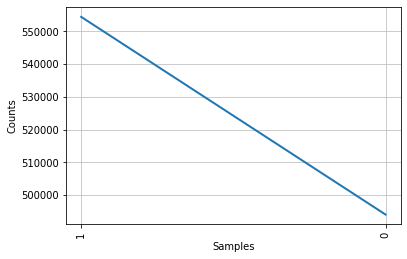

In [ ]:
# Frequency distribution :
from nltk.probability import FreqDist
fdist= FreqDist(data['Sentiment'])
print(fdist.most_common(2))
fdist.plot()

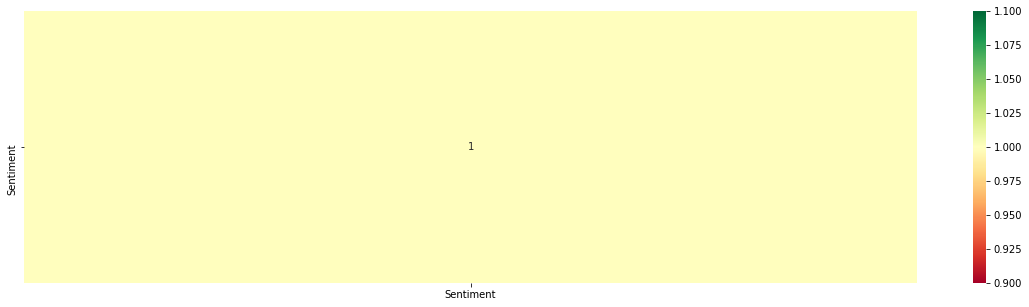

In [ ]:
# Heatmap of correlation
plt.figure(figsize= (20, 5))
correlation= data.corr()
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.show()

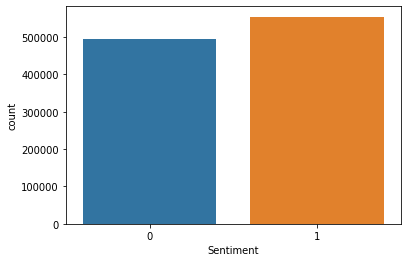

In [ ]:
# Countplot for Sentiment column
seaborn.countplot(x= 'Sentiment', data= data)
plt.show()

In [ ]:
# Removing the noisy text
def noise_removal(text):
    text = re.sub('\[[^]]*\]', '', BeautifulSoup(text, "html.parser").get_text())
    return text
# Applying function on SentimentText column
data['SentimentText']= data['SentimentText'].apply(noise_removal)

In [ ]:
data.head(2)

,Sentiment,SentimentText
89905,1,@cleaninggirl That was adorable!! Thanks for t...
33905,1,@aishadee how's the cheese block going? im so ...


In [ ]:
# Stemming the text
def stemmer(text):
    sbs = SnowballStemmer('english')
    text= ' '.join( [ sbs.stem(word) for word in text.split() ] )
    return text

In [ ]:
# Applying function on Sentiment text column
data['SentimentText']= data['SentimentText'].apply(stemmer)

In [ ]:
data.head(2)

,Sentiment,SentimentText
89905,1,@cleaninggirl that was adorable!! thank for th...
33905,1,@aishade how the chees block going? im so pump...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenization of text
tokenizer= ToktokTokenizer()
# Setting English stopwords
stopwords= nltk.corpus.stopwords.words('english')

In [ ]:
# Removing the stopwords
def removing_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stopwords]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filter_tokens)    
    return filtered_text

In [ ]:
#Applying function on SentimentText column
data['SentimentText']=data['SentimentText'].apply(removing_stopwords)

In [ ]:
data.head(3)

,Sentiment,SentimentText
89905,1,@cleaninggirl adorable ! ! thank rec
33905,1,@aishade chees block going ? im pump im back a...
20164,0,"@_vq_ dallas , boston , london option look mig..."


In [ ]:
# Train- test splitting of our dataframe : x is independent variable and y is dependent variable.
x= data['SentimentText']
y= data['Sentiment']
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test)= train_test_split(x, y, test_size=0.1, random_state=0)

In [ ]:
# Label encoding : labeling the label data
from sklearn.preprocessing import LabelBinarizer
l_b= LabelBinarizer()
# Transformed Sentiment data
label_data= l_b.fit_transform(data['Sentiment'])
print(label_data.shape)

(1048559, 1)


In [ ]:
label_data

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
# Bag of words
# Count Vectorizer for bag of words
cv= CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3) )
# Transformed train 'SentimentText' column
cv_train= cv.fit_transform(x_train)
# Transformed test 'SentimentText' column
cv_test= cv.transform(x_test)
print('Bag of Words shape in Count Vectorizer train set : ',cv_train.shape)
print('Bag of Words shape in Count Vectorizer test set : ',cv_test.shape)

Bag of Words shape in Count Vectorizer train set :  (943703, 7645258)
Bag of Words shape in Count Vectorizer test set :  (104856, 7645258)


In [ ]:
# Training the model
lor_cv= LogisticRegression(random_state= 1)
# Fitting the model for Bag of words
lor_cv.fit(cv_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the model for bag of words
lor_bow_predict = lor_cv.predict(cv_test )
#Accuracy score for bag of words
accuracy= accuracy_score(y_test, lor_bow_predict ).round(decimals= 4)
accuracy_cv = accuracy * 100
print('Logistic Regression Bag of words accuracy score :', accuracy_cv , '% .' )
print('Logistic Regression Bag of words classification_report :','\n', classification_report(y_test, lor_bow_predict ) )
print('Logistic Regression Bag of words confusion_matrix :','\n', confusion_matrix(y_test, lor_bow_predict ) )

Logistic Regression Bag of words accuracy score : 58.46 % .
Logistic Regression Bag of words classification_report : 
               precision    recall  f1-score   support

           0       0.62      0.30      0.40     49372
           1       0.57      0.84      0.68     55484

    accuracy                           0.58    104856
   macro avg       0.60      0.57      0.54    104856
weighted avg       0.60      0.58      0.55    104856

Logistic Regression Bag of words confusion_matrix : 
 [[14784 34588]
 [ 8973 46511]]


In [ ]:
# Tf: Term frequency, and IDF: Inverse document frequency
# Tfidf Vectorizer
tf= TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3) )
# Transformed train 'SentimentText' column
tf_train= tf.fit_transform(x_train)
# Transformed test 'SentimentText' column
tf_test= tf.transform(x_test)
print('Term frequency , Independent document frequency train set shape :', tf_train.shape)
print('Term frequency , Independent document frequency test set shape :', tf_test.shape)

Term frequency , Independent document frequency train set shape : (943703, 7645258)
Term frequency , Independent document frequency test set shape : (104856, 7645258)


In [ ]:
# Training the model
lor_tf = LogisticRegression(random_state= 1)
# Fitting the model for tfidf features
lor_tf.fit(tf_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the model for tfidf features
lor_tfidf_predict= lor_tf.predict(tf_test)
# Accuracy score for tfidf features
accuracy= accuracy_score(y_test, lor_tfidf_predict ).round(decimals= 4)
accuracy_tfidf = accuracy * 100
print('Logistic Regression tfidf accuracy score :', accuracy_tfidf, '% .' )
print('Logistic Regression tfidf classification_report :','\n', classification_report(y_test, lor_tfidf_predict ) )
print('Logistic Regression tfidf confusion_matrix :','\n', confusion_matrix(y_test, lor_tfidf_predict ) )

Logistic Regression tfidf accuracy score : 57.87 % .
Logistic Regression tfidf classification_report : 
               precision    recall  f1-score   support

           0       0.64      0.24      0.35     49372
           1       0.57      0.88      0.69     55484

    accuracy                           0.58    104856
   macro avg       0.60      0.56      0.52    104856
weighted avg       0.60      0.58      0.53    104856

Logistic Regression tfidf confusion_matrix : 
 [[11745 37627]
 [ 6547 48937]]


In [ ]:
# Comparing Count Vectorizer and Term frequency , Independent document frequency accuracy scores :
df= pandas.DataFrame({'Methods':['Count Vectorizer','Term frequency, Independent document frequency'], 'Accuracy score': [accuracy_cv, accuracy_tfidf] } )
df

,Methods,Accuracy score
0,Count Vectorizer,58.46
1,"Term frequency, Independent document frequency",57.87


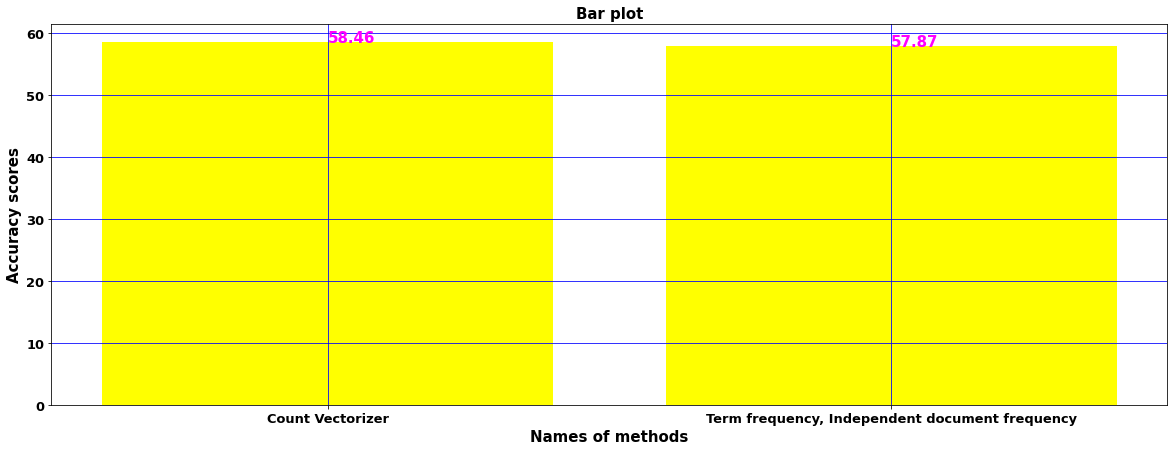

In [ ]:
# Bar plot
plt.figure(figsize= (20, 7))
plt.bar(df['Methods'], df['Accuracy score'], linewidth= 2, color= 'yellow')
plt.grid(color= 'blue')
plt.title('Bar plot', fontweight= 'bold', fontsize= 15)
plt.xlabel('Names of methods', fontweight= 'bold', fontsize= 15)
plt.ylabel('Accuracy scores', fontweight= 'bold', fontsize= 15)
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
for x,y in zip(df['Methods'], df['Accuracy score']): 
    plt.text(x, y, str(y), fontweight= 'bold', fontsize= 15, color= 'magenta')
plt.show()

In [50]:
# Testing our model
test_review= ['I hate reading song survey as it makes me cry.']
transformed_review = cv.transform(test_review)
sentiment_prediction= lor_cv.predict(transformed_review)
if sentiment_prediction== 0:
    print('This Twitter review is of Sad category.')
else:
    print('This Twitter review is of Happy category.')

This Twitter review is of Sad category.


In [51]:
# Testing our model
test_review= ['You are looking very beautiful today.']
transformed_review = cv.transform(test_review)
sentiment_prediction= lor_cv.predict(transformed_review)
if sentiment_prediction== 0:
    print('This Twitter review is of Sad category.')
else:
    print('This Twitter review is of Happy category.')

This Twitter review is of Happy category.


In [52]:
# Testing our model
test_review= ['I do not like this product. It is not working as it was shown on the site.']
transformed_review = cv.transform(test_review)
sentiment_prediction= lor_cv.predict(transformed_review)
if sentiment_prediction== 0:
    print('This Twitter review is of Sad category.')
else:
    print('This Twitter review is of Happy category.')

This Twitter review is of Sad category.


In [53]:
# Testing our model
test_review= ['This film is amazing. The actress was looking very charming.']
transformed_review = cv.transform(test_review)
sentiment_prediction= lor_cv.predict(transformed_review)
if sentiment_prediction== 0:
    print('This Twitter review is of Sad category.')
else:
    print('This Twitter review is of Happy category.')

This Twitter review is of Happy category.
